**For mounting the google drive with git and pulling changes**


**Block-1 : Import Necessary Modules**

In [2]:
# We need to import the following libraries for our demo code to function correctly
import matplotlib.pyplot as plt
import tensorflow as tf

**Block-2 : Import all Module .py files**

In [3]:
#To load all the different modules required for complete functionality
#Architecture : Contains the complete architecture of model and all the helping functions to perform the task
#Data_Loading : Contains the functions to load and pre-process the data
#Test : Contains the functions to test the model and present the evaluation report as well as function for acatual prediction
#Train : Contains the functions to train the model, save it and produce training history

from Files import Architecture
from Files import Data_Loading
from Files import Test
from Files import Train


**Block-3 : Dataset Path and Hyper Parameters**

In [4]:
# path for input images/data
images_path = 'dataset'

# hyper parameters setting
#batch_size : General value is set as normally taken
#lr = learning rate : After testing and getting best results
#epochs : The optimal amount of epochs to attain best results

hyper_params = {"lr": 1e-4,"batch_size": 32,"epochs": 20}

**Block-4 : Load Dataset**

In [6]:
# Load images using the function present in Data_Loading module
trainX, testX, trainY, testY =Data_Loading.load_images_and_labels(images_path)

[INFO] Loading Images......
[INFO] Loaded


**Block-5 : Sample from Dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


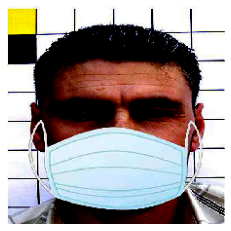

In [10]:
# view sample loaded image
plt.axis('off')
plt.imshow(trainX[1])

**Block-6 : Load Model(if applicable)**

In [4]:
#If you already have a trained model present and want to use it directly then run this cell to load the saved model
model = tf.keras.models.load_model('classifier_model.h5')

**Block-7 : Build Model(if not loaded already)**

In [6]:
#build the model from Architecture file if not loaded already
model = Architecture.fine_tune_architecture()

C:\Users\Saim Khan\anaconda3\envs\tf_gpu\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


**Block-8 : Train Model**

In [7]:
#train model and get model as well as training history using the function training from the Train module
model, history = Train.training(model,trainX, testX, trainY, testY, hyper_params)


[INFO] compiling model...
[INFO] training head...
  ...
    to  
  ['...']
Train for 35 steps, validate on 276 samples
Epoch 1/20
35/35 [==============================] - 17s 497ms/step - loss: 0.3505 - accuracy: 0.8300 - val_loss: 0.0750 - val_accuracy: 0.9819

**Block-9 : Model Training History**

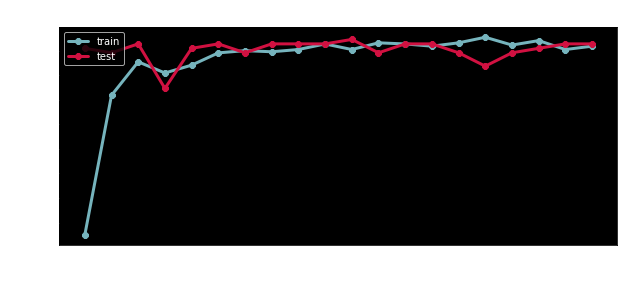

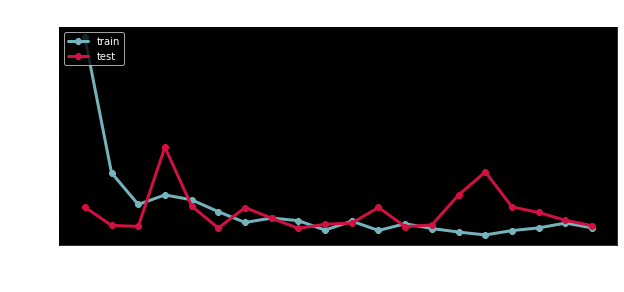

In [60]:
#Plot the Accuracy history as well as Loss history of the Training and Validation Data
Train.plot_accuracy_history(history)
Train.plot_loss_history(history)

**Block-10 : Evaluate Model**

[INFO] evaluating network...


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276


AUC: 1.00





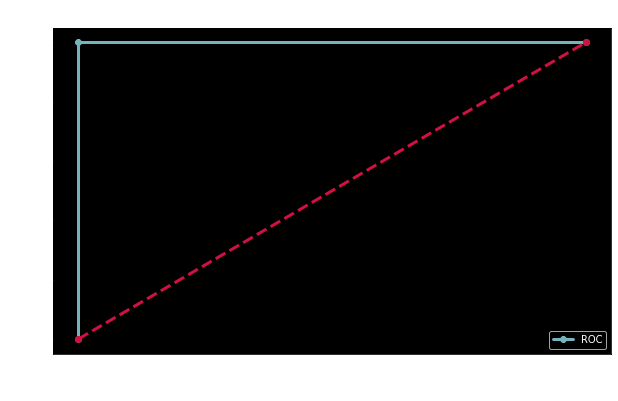

In [13]:
#Evaluate the model on Test data and generate Precision , Recall , AUC and ROC Curve
Test.evalute_report(model,testX,testY,hyper_params)


**Block-11 : Sample Detections**

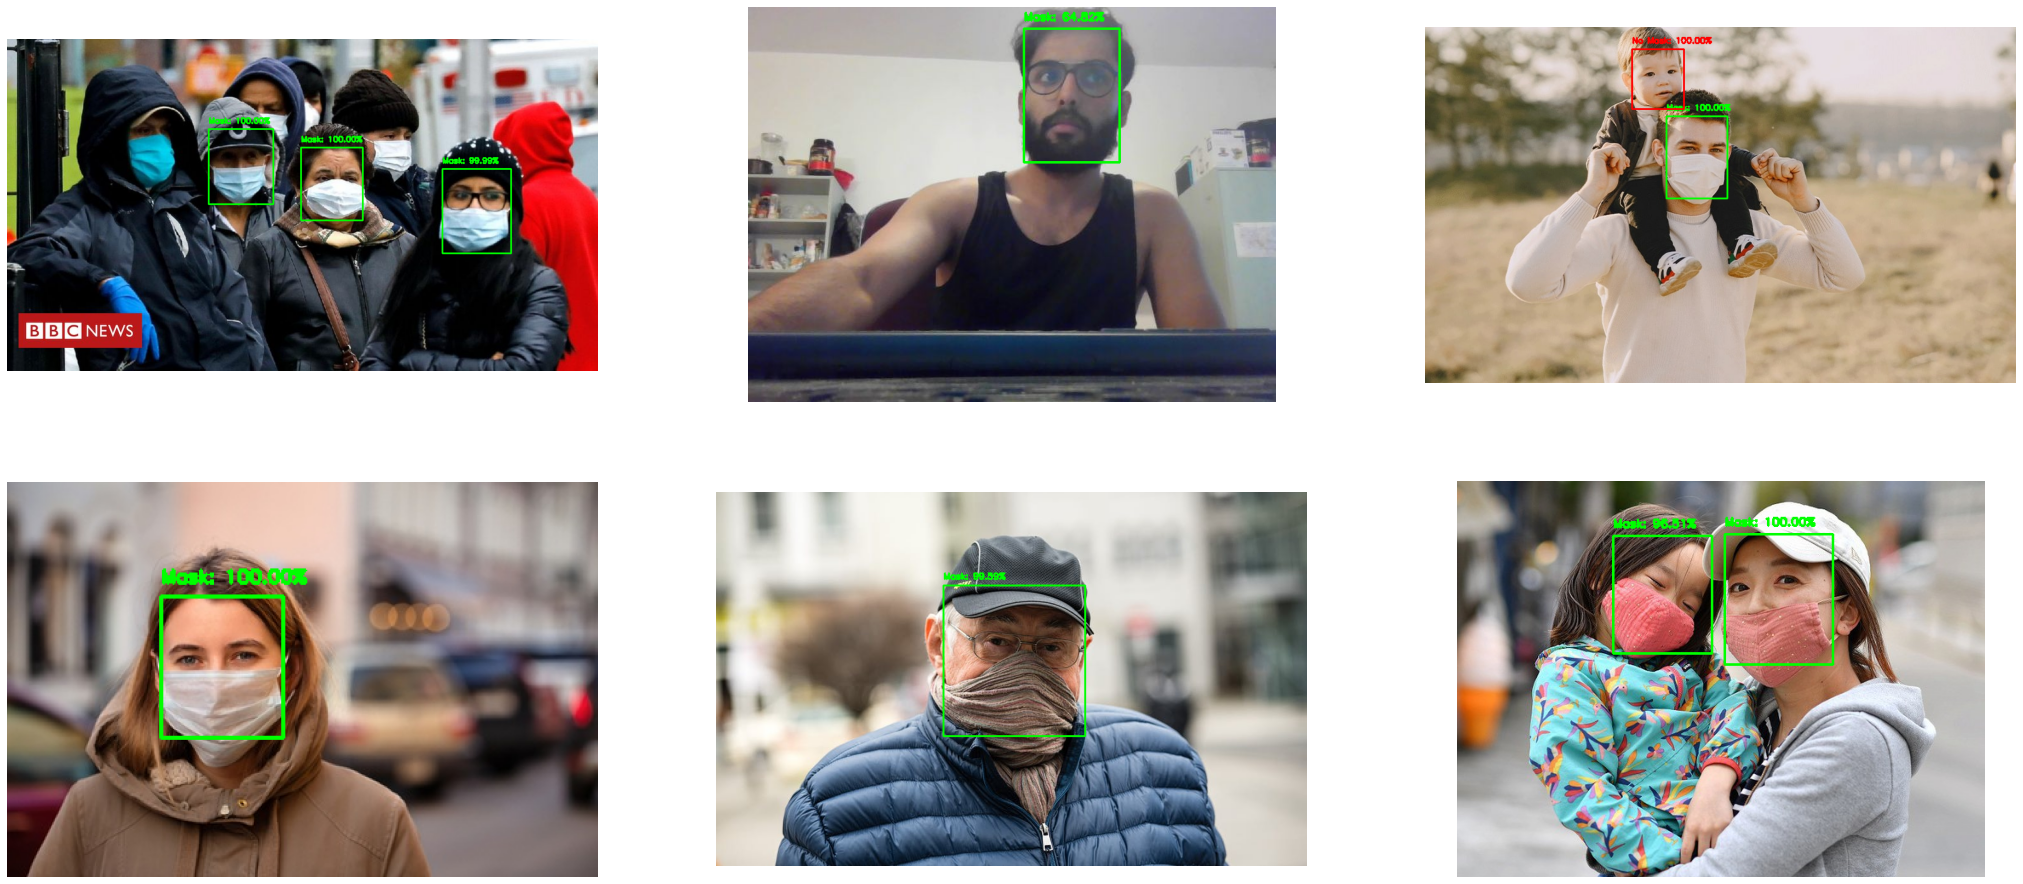

In [14]:
#To check the result of testing our model on some sample images
plt.figure(figsize=(36,16))
for i in range(6):
    plt.subplot(2,3,i+1)
    Test.show_img(str(i+1)+".jpg")

**Block-12 : Difficult Sample Detection**

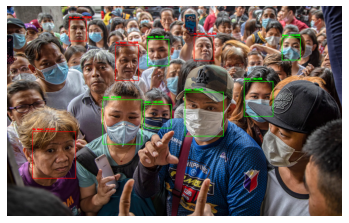

In [15]:
#To check our model's result on a difficult sample image
Test.show_img("10.webp")


**Block-13 : Google Colab Webcam Integration**

In [70]:
#When running the file on Google Colab run this cell to use webcam to take an image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='examples/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename.split("/")[1]

image_file = take_photo()


ModuleNotFoundError: No module named 'google.colab'

**Block-14 : Google Colab Webcam Image Prediction**

In [ ]:
#Now check the result produced by model on the Image taken by running the cell above this cell
Test.show_img(image_file)

**Block-15 : Webcam Live Results Demo**

In [5]:
#When running on local machine run this cell for live webcam face mask detection using our model
Architecture.mask_detection_video()



[INFO] starting video stream...
